In [64]:
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2

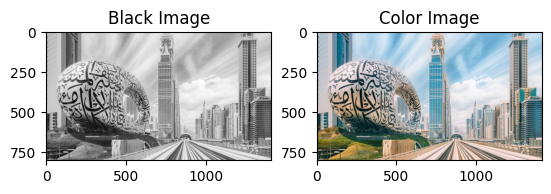

In [65]:
filename = 'Dubai_20221104170228.jpg'
image = plt.imread(filename)
black_image = cv2.imread(filename,0)
# plt.figure(figsize=(10,9))
plt.subplot(121)
plt.title('Black Image')
plt.imshow(black_image,cmap='gray')
plt.subplot(122)
plt.title('Color Image')
plt.imshow(image)


In [66]:
# defining noise std
noise_std = np.mean(image)/5
print(np.min(image), np.max(image))
print(np.mean(image))

0 255
164.05440956467055


In [67]:
noise_std = np.mean(black_image)/5
print(np.min(black_image), np.max(black_image))
print(np.mean(black_image))

0 255
164.25673960886883


In [68]:
noise = np.random.normal(0, noise_std, black_image.shape)

In [69]:
a = np.count_nonzero(noise)

In [70]:
b = np.shape(black_image)

In [71]:
s = b[0] * b[1]

In [72]:
ro = a/s

In [73]:
print(f'ro is equal: {ro}')

ro is equal: 1.0


In [74]:
im_plus_noise = black_image + noise

Text(0.5, 1.0, 'Noised Image')

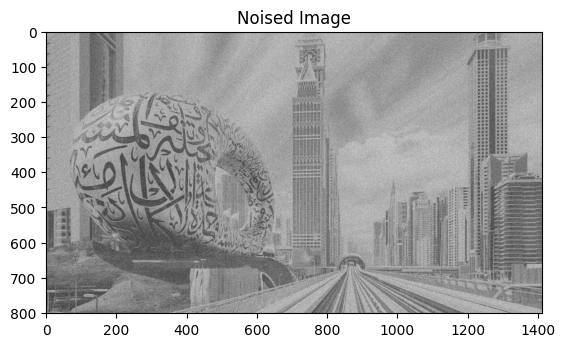

In [75]:
plt.imshow(im_plus_noise,cmap = 'gray')
plt.title('Noised Image')

In [76]:
np.mean(black_image)

164.25673960886883

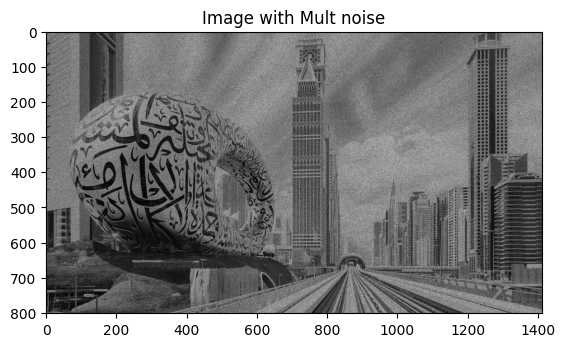

In [77]:
noise = np.random.normal(1.0, 0.001*np.mean(black_image), black_image.shape)
im_mult_noise = black_image * noise
plt.figure()
plt.imshow(im_mult_noise, cmap='gray')
plt.title('Image with Mult noise')
noise_fft = np.fft.fft2(noise)
noise_fft = np.fft.fftshift(noise_fft)

In [78]:
noise_fft = np.fft.fft2(noise)


In [79]:
a = np.copy(im_plus_noise)

In [80]:
x = 802

In [81]:
a[np.array(range(int(0.1*x), int(0.9*x))),:] = 0

In [82]:
a

array([[172.63666504, 187.24594702, 177.58307039, ..., 201.83018395,
        210.8245357 , 188.06606464],
       [160.887539  , 193.81859173, 193.52798107, ..., 230.93766185,
        211.73090107, 246.72002951],
       [190.68270749, 210.72595325, 208.60693994, ..., 222.08614683,
        198.26214591, 241.06333797],
       ...,
       [232.94525969, 281.35373313, 213.84670556, ..., 267.13156044,
        223.01074341, 243.03889112],
       [166.44930844, 190.12705682, 113.17262485, ..., 200.76812342,
        223.74266393, 278.47563154],
       [ 74.0145204 ,  92.05177599,  60.50722719, ..., 242.8340103 ,
        236.23727463, 235.13535454]])

In [83]:
def denoising_by_mask_fft2(noised_image, mask_x,mask_y):
    noised_im_fft2 = np.fft.fft2(noised_image)
    noised_im_fft2 = np.fft.fftshift(noised_im_fft2)
    peaks = noised_im_fft2.copy()
    peaks[mask_x,:] = 0
    peaks[:,mask_y] = 0
    peaks = np.fft.ifftshift(peaks)
    denoised_im = np.fft.ifft2(peaks).real
    plt.figure()
    plt.imshow(np.abs(noised_im_fft2), cmap='gray')
    plt.title('Fourier transform')
    
    
    plt.figure()
    plot_spectrum(peaks)
#     plt.imshow(np.abs(peaks),cmap = 'gray')
    plt.title('Peaks')
    
    return denoised_im



In [84]:
(x,y) = im_plus_noise.shape

In [85]:
center_mask_x = np.hstack((np.array(range(1, int(0.5 * x - 0.1 * x))), 
                 np.array(range(int(0.5 * x + 0.1 * x), x))))
center_mask_y = np.hstack((np.array(range(1, int(0.5 * y - 0.1 * y))), 
                 np.array(range(int(0.5 * y + 0.1 * y), y))))

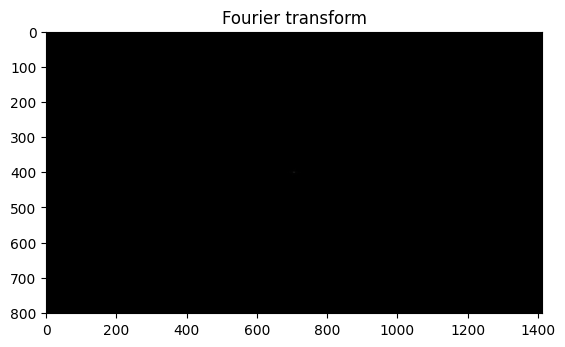

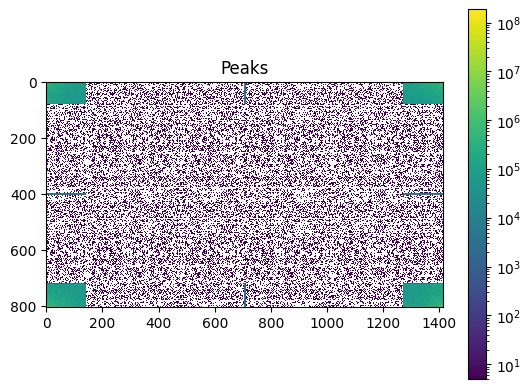

In [86]:
denoised_im = denoising_by_mask_fft2(im_plus_noise, center_mask_x, center_mask_y)


Text(0.5, 1.0, 'Noised Image')

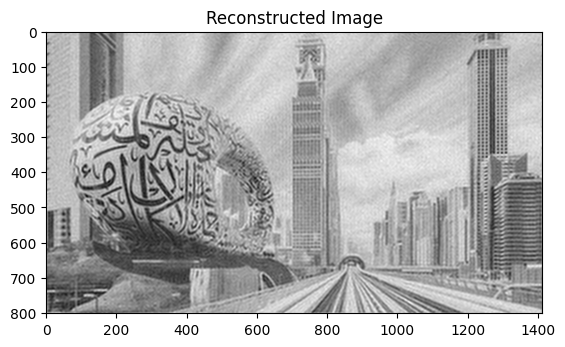

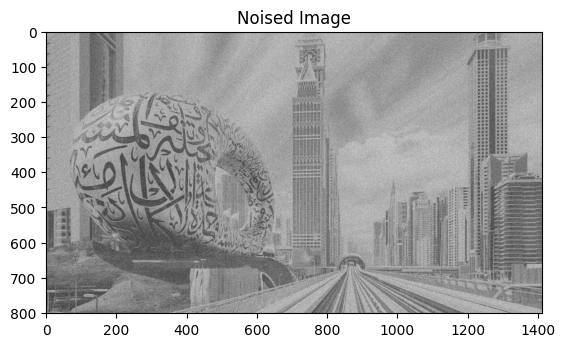

In [87]:
plt.figure()
plt.imshow(denoised_im, cmap='gray')
plt.title('Reconstructed Image')
plt.figure()
plt.imshow(im_plus_noise, cmap='gray')
plt.title('Noised Image')

Text(0.5, 1.0, 'Blurred image')

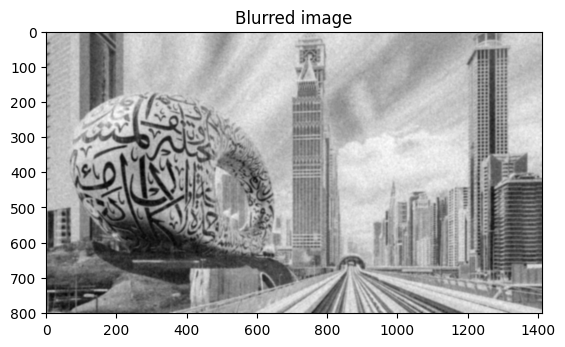

In [88]:
from scipy import ndimage
gaus_filter = ndimage.gaussian_filter(im_plus_noise, 2)
plt.figure()
plt.imshow(gaus_filter, plt.cm.gray)
plt.title('Blurred image')


In [89]:
def calculate_nmse(black_image, reconstructed_matrix):
    error = black_image - reconstructed_matrix
    mse = np.mean(np.square(error))
    nmse = mse / np.mean(np.square(black_image))

    return nmse

In [90]:
print('NMSE between original and additively noised images:')
print(calculate_nmse(black_image, im_plus_noise))

print('NMSE between original and denoised images:')
print(calculate_nmse(black_image, denoised_im))

NMSE between original and additively noised images:
9.558795324570495
NMSE between original and denoised images:
3.978067336610111


Text(0.5, 1.0, 'Reconstructed Image')

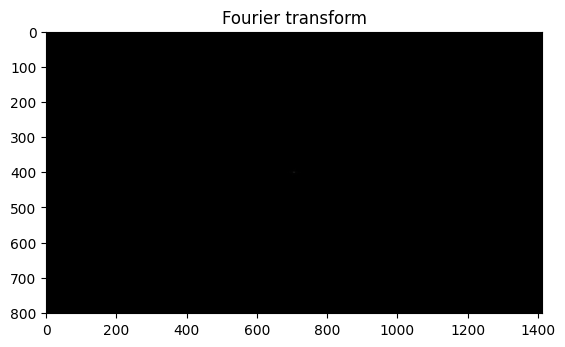

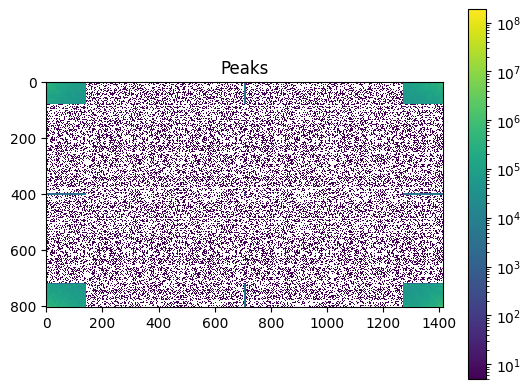

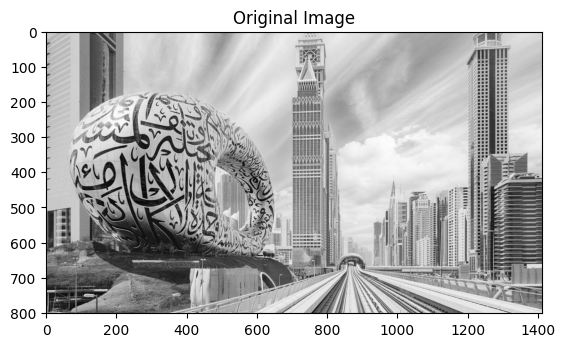

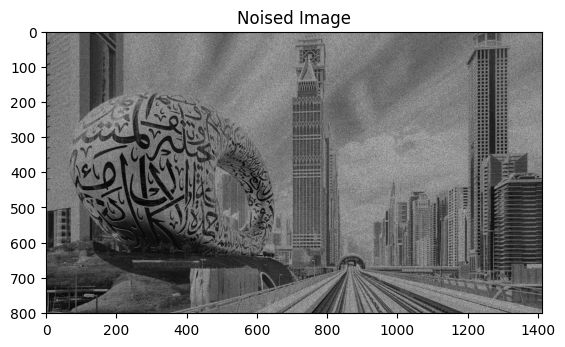

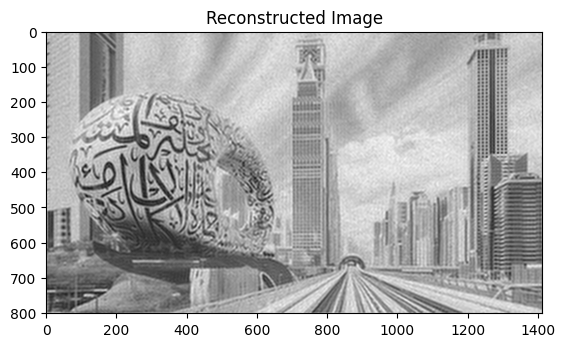

In [93]:
(x, y) = im_mult_noise.shape
corner_mask_x = np.array(range(int(0.1*x), int(0.9*x)))
corner_mask_y = np.array(range(int(0.1*y), int(0.9*y)))
denoised_im2 = denoising_by_mask_fft2(im_mult_noise, center_mask_x, center_mask_y)
plt.figure()
plt.imshow(black_image, cmap='gray')
plt.title('Original Image')
plt.figure()
plt.imshow(im_mult_noise, cmap='gray')
plt.title('Noised Image')
plt.figure()
plt.imshow(denoised_im2, cmap='gray')
plt.title('Reconstructed Image')

In [94]:
print('NMSE between original and additively noised images:')
print(calculate_nmse(black_image, im_mult_noise))

print('NMSE between original and denoised images:')
print(calculate_nmse(black_image, denoised_im2))

NMSE between original and additively noised images:
7.315353105955933
NMSE between original and denoised images:
3.886726569771602
